In [1]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F
import os 
from models.unet import UNet


In [10]:
model = UNet(n_class = 1)
model.load_state_dict(torch.load('trained_model/unet_midv_9.pt'))
model = nn.Sequential(model, nn.Sigmoid())

model.cuda()

Sequential(
  (0): UNet(
    (dconv1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
    (dconv2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
    (dconv3): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
    (dconv4): Sequential(
      (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(i

In [11]:
model.eval()

Sequential(
  (0): UNet(
    (dconv1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
    (dconv2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
    (dconv3): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
    (dconv4): Sequential(
      (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(i

In [12]:
torch.cuda.empty_cache()

In [13]:
import albumentations

In [14]:
transform = albumentations.Compose( [albumentations.LongestMaxSize(max_size=512, p=1)], p=1  )

In [147]:
# example images 
import matplotlib.pyplot as plt
import cv2 
import numpy as np 

image = cv2.imread('data_processed/images/{}'.format(np.random.choice(os.listdir('data_processed/images'))))
image = cv2.resize(image, (512, 512))

In [148]:
output = model(torch.from_numpy(image).unsqueeze(0).view(1, 3, 512, 512).float().cuda())

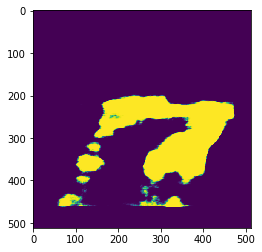

In [149]:
plt.imshow(output.cpu().squeeze().detach().numpy())

In [ ]:
import numpy as np 

In [ ]:
output

In [ ]:
_image= output.squeeze(0)